In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def add_dataset_to_plot(densities, times, label, handles):
    handle, = plt.plot(densities, np.log(times), label=label, marker='o')
    handles.append(handle)
    return

def plot_dataset(dataset_name, handles):
    dataset = pd.read_csv(dataset_name, header=None)
    N = 2**14
    filtered = dataset[dataset[0] == N]
    
    if dataset_name == 'cusp_csr_denseMat.csv':
        # Edge case... Don't know why this data is in strange format.
        dataset = dataset
        filtered = filtered = dataset[dataset[0] == N]
        densities = filtered[1]
        times = filtered[2]
    elif len(filtered) == 0:
        # Then the data is in tabular format. Transpose it and get it appropriately.
        densities = dataset[0].values
        dataset = dataset.T
        filtered = dataset[dataset[0] == N]
        times = filtered.values[0]
    else:
        # Then the data was in 2-column format.
        densities = filtered[1].values
        times = filtered[2].values
    # Add it to handles.
    add_dataset_to_plot(densities, times, dataset_name.split('.csv')[0], handles)
    return


def plot_datasets(all_datasets):
    handles = []
    for dataset_name in all_datasets:
        plot_dataset(dataset_name, handles)
    
    # Now, show the plot.
    plt.legend(handles=handles)
    return

In [3]:
# csv_files = []
# for root, dirs_root, files in os.walk("./"):
#         for file in files:
#             if '.csv' in file:
#                 csv_files.append(file)

# csv_files
# all_datasets = csv_files

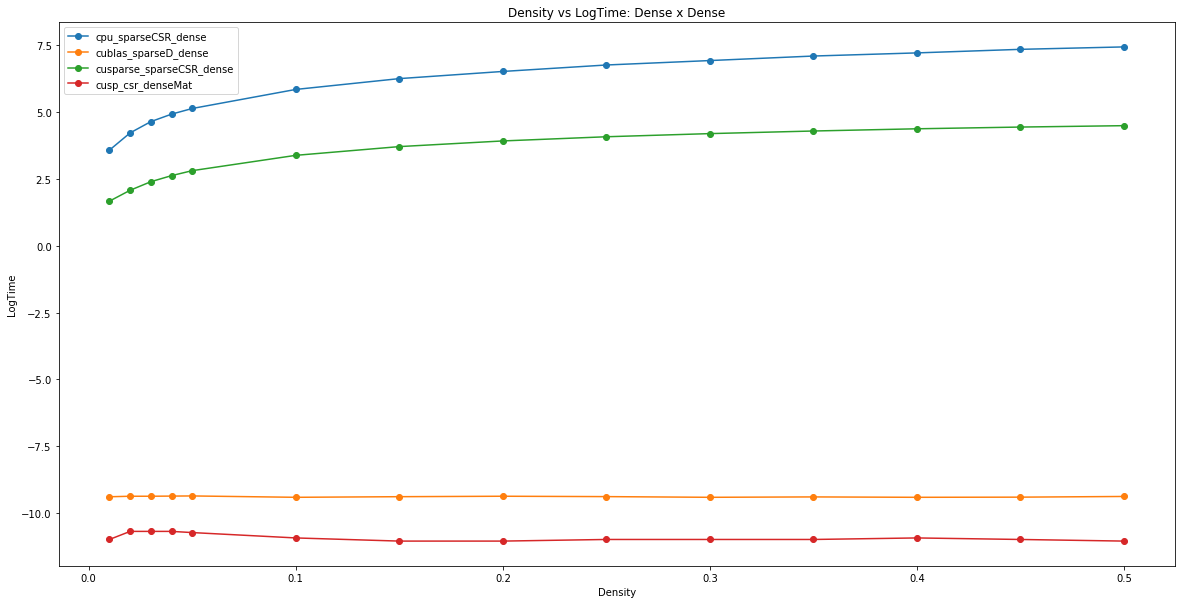

In [3]:
set1 = ['cpu_sparseCSR_dense.csv','cublas_sparseD_dense.csv','cusparse_sparseCSR_dense.csv', 'cusp_csr_denseMat.csv']
plt.figure(figsize=(20,10))
plt.ylabel('LogTime')
plt.xlabel('Density')
plt.title('Density vs LogTime: Dense x Dense')
plot_datasets(set1)

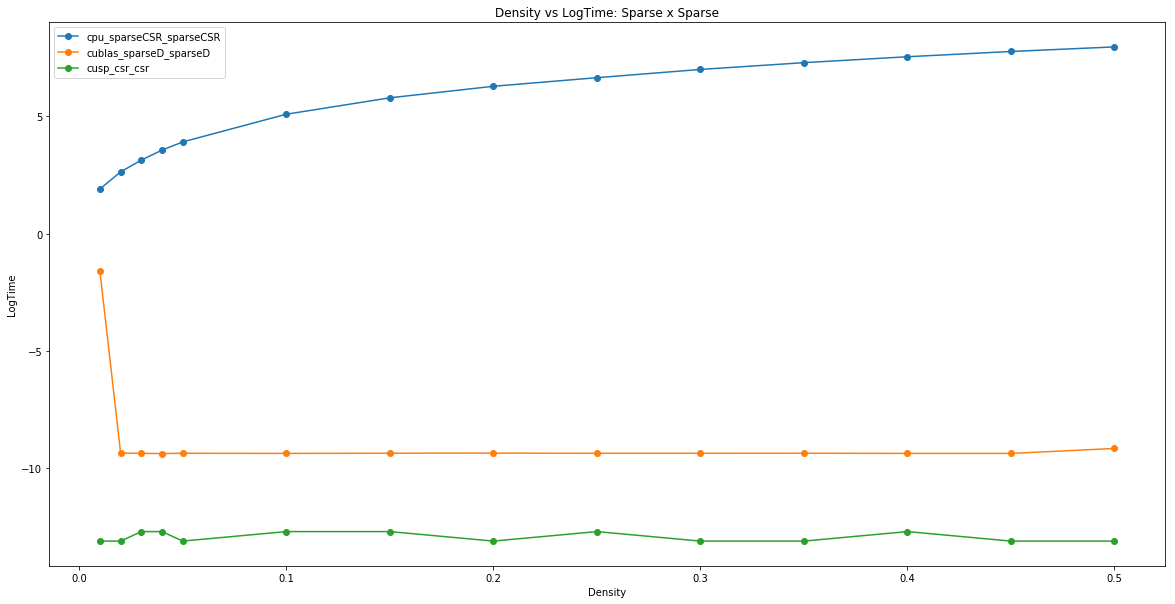

In [4]:
set2 = ['cpu_sparseCSR_sparseCSR.csv', 'cublas_sparseD_sparseD.csv', 'cusp_csr_csr.csv']
plt.figure(figsize=(20,10))
plt.ylabel('LogTime')
plt.xlabel('Density')
plt.title('Density vs LogTime: Sparse x Sparse')
plot_datasets(set2)

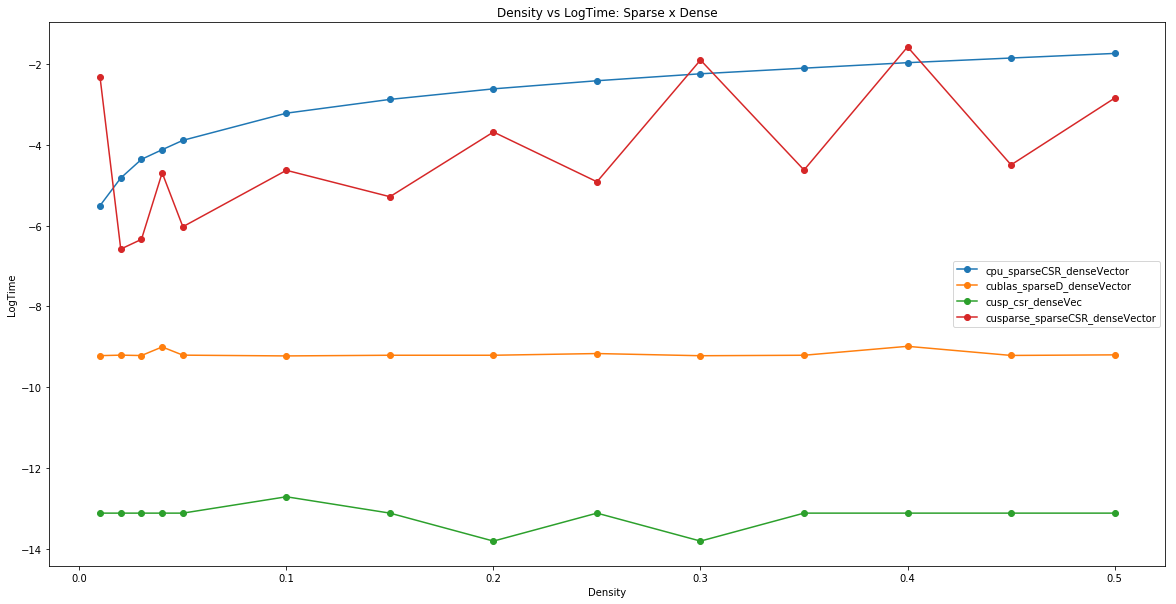

In [5]:
set3 = ['cpu_sparseCSR_denseVector.csv', 'cublas_sparseD_denseVector.csv', 'cusp_csr_denseVec.csv','cusparse_sparseCSR_denseVector.csv']
plt.figure(figsize=(20,10))
plt.ylabel('LogTime')
plt.xlabel('Density')
plt.title('Density vs LogTime: Sparse x Dense')
plot_datasets(set3)

In [9]:
# # TESTING

# # Import the file, and 
# cusp_csr_csr = pd.read_csv("cusp_csr_csr.csv", header=None)
# # Filter for only N=2^14
# N = 2**14
# filtered = cusp_csr_csr[cusp_csr_csr[0] == N]
# densities = filtered[1].values
# times = filtered[2].values
# handles = []
# add_dataset_to_plot(densities, times, 'csr_csr', handles)

# plt.legend(handles=handles)

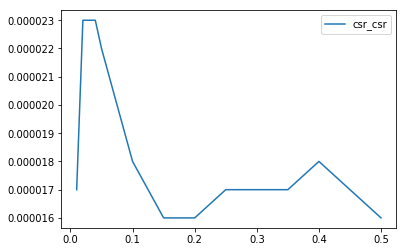

In [79]:
# TESTING

# Import the file, and 
cusp_csr_csr = pd.read_csv("cusp_csr_denseMat.csv", header=None)
# Filter for only N=2^14
N = 2**14
filtered = cusp_csr_csr[cusp_csr_csr[0] == N]
densities = filtered[1].values
times = filtered[2].values
handles = []
add_dataset_to_plot(densities, times, 'csr_csr', handles)

plt.legend(handles=handles)

In [82]:
cusp_csr_csr = cusp_csr_csr.T
cusp_csr_csr 

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000
1,0.010000,0.020000,0.030000,0.040000,0.050000,0.100000,0.150000,0.200000,0.250000,0.300000,...,0.050000,0.100000,0.150000,0.200000,0.250000,0.300000,0.350000,0.400000,0.450000,0.500000
2,0.000219,0.000012,0.000013,0.000013,0.000012,0.000012,0.000012,0.000013,0.000012,0.000012,...,0.000022,0.000018,0.000016,0.000016,0.000017,0.000017,0.000017,0.000018,0.000017,0.000016


In [86]:
filtered[2].values

array([1.70000003e-05, 2.30000005e-05, 2.30000005e-05, 2.30000005e-05,
       2.20000002e-05, 1.80000006e-05, 1.60000000e-05, 1.60000000e-05,
       1.70000003e-05, 1.70000003e-05, 1.70000003e-05, 1.80000006e-05,
       1.70000003e-05, 1.60000000e-05])

In [41]:
filtered = cusp_csr_csr[cusp_csr_csr[0] == N]
filtered

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
11,16384.0,0.00409,0.008101,0.012869,0.016338,0.020606,0.040409,0.05684,0.073828,0.090292,0.107246,0.123309,0.141267,0.158521,0.177669


In [65]:
filtered.values.shape

(1, 15)

In [54]:
np.array(cusp_csr_csr.T[0].values).shape

(15,)

In [55]:
cusp_csr_csr.T[0].values

array([ nan, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ,
       0.35, 0.4 , 0.45, 0.5 ])